In [1]:
import pandas as pd
import numpy as np
import csv
import copy
from collections import defaultdict

In [2]:
#Import all the data

#Households data
vehicle_type_big_data = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_vehicles.csv', encoding = "ISO-8859-1")

#Vehicle trip data
vgps_trips_big_data = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/v_gpstrips.csv', encoding = "ISO-8859-1")

In [7]:
vehicle_type_info = vehicle_type_big_data[['sampno', 'vehno', 'veh_type']]
vehicle_type_info

,sampno,vehno,veh_type
0,7156986,2,2
1,7156986,3,2
2,7157693,1,2
3,7158808,1,2
4,7158808,2,2
5,7158870,1,2
6,7158870,2,2
7,7159089,1,2
8,7159089,2,2
9,7160186,1,2


In [25]:
xxx = vehicle_type_info[vehicle_type_info.veh_type==0]
xxx

,sampno,vehno,veh_type


In [5]:
vgps_trips = vgps_trips_big_data[['sampno', 'vehno']]
vgps_trips.head(5)

,sampno,vehno
0,1776019,2
1,2759536,2
2,2055542,1
3,2556033,1
4,2759536,1


In [33]:
d = defaultdict(lambda: defaultdict(int))
d

defaultdict(<function __main__.<lambda>()>, {})

In [34]:
for row in vehicle_type_info.values:
    sampno = row[0]
    vehno = row[1]
    vehType = row[2]
    
    d[sampno][vehno] = vehType
    
d
    

defaultdict(<function __main__.<lambda>()>,
            {7156986: defaultdict(int, {2: 2, 3: 2, 1: 2}),
             7157693: defaultdict(int, {1: 2}),
             7158808: defaultdict(int, {1: 2, 2: 2}),
             7158870: defaultdict(int, {1: 2, 2: 2}),
             7159089: defaultdict(int, {1: 2, 2: 2}),
             7160186: defaultdict(int, {1: 2, 2: 2}),
             7163193: defaultdict(int, {1: 2, 2: 2}),
             7163480: defaultdict(int, {1: 2, 2: 2}),
             7163555: defaultdict(int, {1: 2}),
             7163889: defaultdict(int, {1: 2, 2: 2, 3: 2, 4: 2}),
             7164822: defaultdict(int, {1: 2, 2: 2}),
             7165540: defaultdict(int, {1: 2, 2: 2}),
             7168791: defaultdict(int, {1: 2, 2: 2, 3: 2}),
             7168963: defaultdict(int, {1: 2, 2: 2, 3: 2}),
             7169214: defaultdict(int, {1: 1, 2: 2}),
             7169686: defaultdict(int, {1: 2, 2: 2, 3: 2}),
             7169816: defaultdict(int, {1: 2, 2: 2, 3: 2}),
        

In [35]:
count = defaultdict(int)

In [36]:
for trip in vgps_trips.values:
    trip_sampno = trip[0]
    trip_vehno = trip[1]
    
    trip_vehType_x = d[trip_sampno][trip_vehno]
    
    if count[trip_vehType_x] == 0:
        count[trip_vehType_x] = 1
        
    elif count[trip_vehType_x] != 0:
        count[trip_vehType_x] += 1
        

In [37]:
count

defaultdict(int,
            {2: 16692, 1: 1637, 0: 82, 3: 595, 7: 22, 6: 14, 4: 17, 5: 16})

In [41]:
#turn a dictionary into a dataframe
count_df = pd.DataFrame(list(count.items()), columns=['vehicle_type', 'count'])
count_df

,vehicle_type,count
0,2,16692
1,1,1637
2,0,82
3,3,595
4,7,22
5,6,14
6,4,17
7,5,16


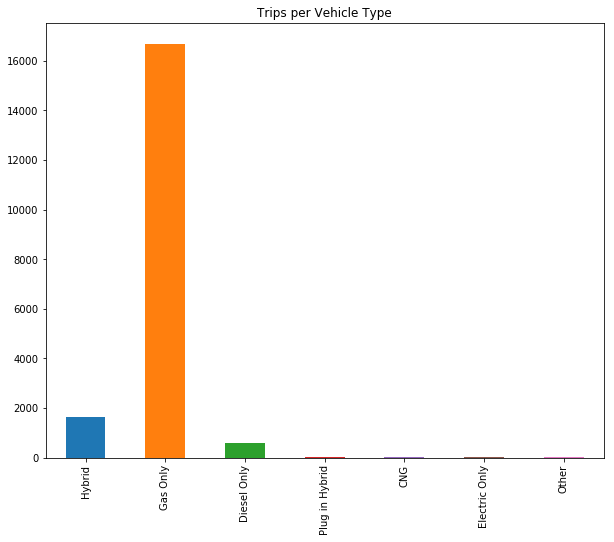

In [39]:
#build the Series
trip_counts_Series = pd.Series([1637,16692,595,17,16,14,22], index= ['Hybrid','Gas Only','Diesel Only','Plug in Hybrid','CNG','Electric Only','Other'])

#build the plot from "trip_counts_Series"
trip_count_plot = trip_counts_Series.plot(kind='bar', title="Trips per Vehicle Type", figsize=(10,8))

